## Importing Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

## Data Augmentation on Multiple Images

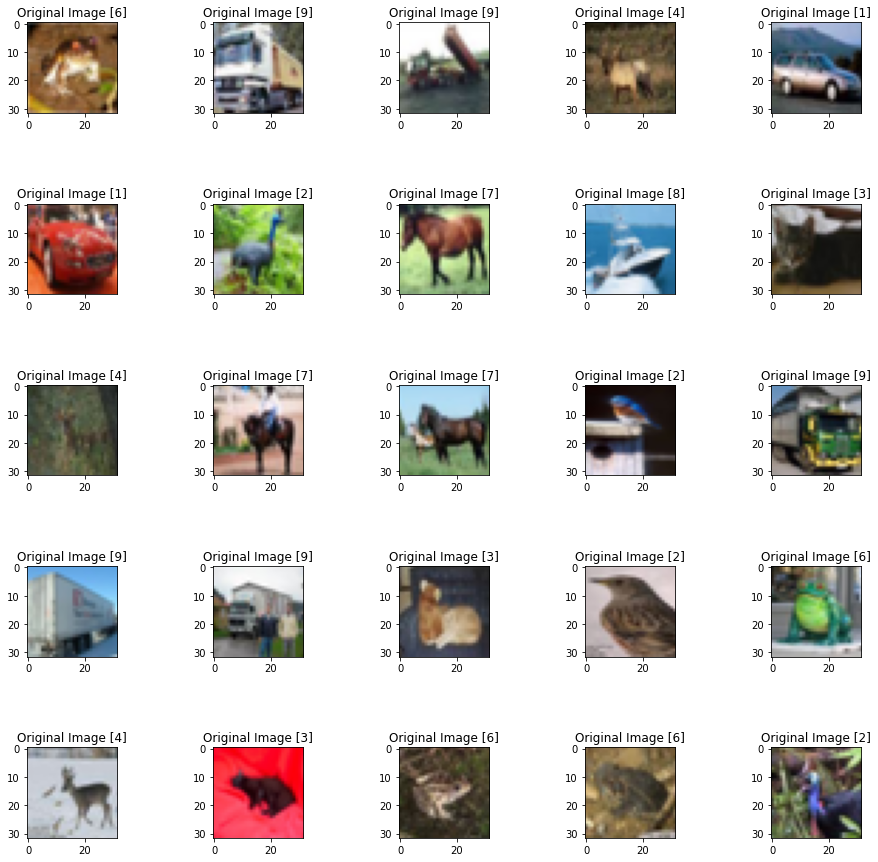

In [ ]:
(x_train,y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

def data_generator(x_train):
  x_train=x_train.reshape(-1,32,32,3)
  train_dataset=tf.data.Dataset.from_tensor_slices((x_train,y_train))
  train_dataset=train_dataset.batch(25)
  return train_dataset

def show_img(train_dataset):
  plt.figure(figsize=(15,15))
  for i in range(25):
    for val in train_dataset.take(1):
      plt.subplot(5,5,i+1)
      plt.imshow(val[0][i])
      plt.title("Original Image "+str(val[1][i].numpy()))
      plt.subplots_adjust(wspace=1, hspace=1)
  plt.show()

train_dataset = data_generator(x_train)
show_img(train_dataset)

## RGB to gray scale

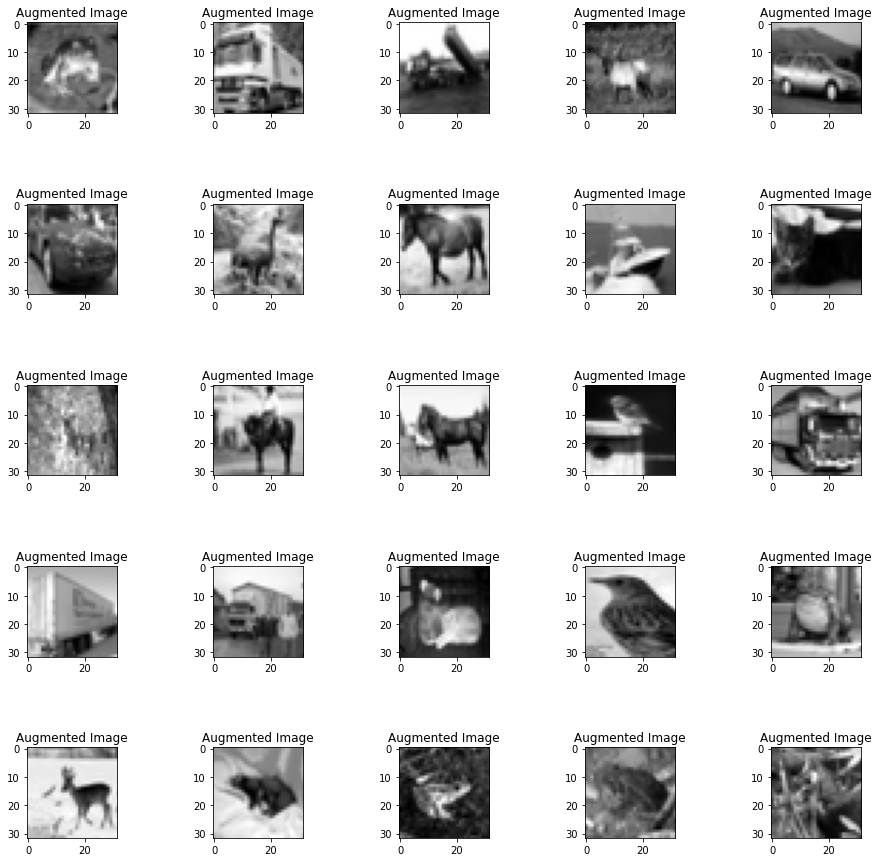

In [ ]:
def rgb_to_grayscale(img):
  return tf.image.rgb_to_grayscale(img)

def data_generator(x_train,func):
  x_train=x_train.reshape(-1,32,32,3)
  train_dataset=tf.data.Dataset.from_tensor_slices(x_train)
  train_dataset=train_dataset.map(func)
  train_dataset=train_dataset.batch(512)
  return train_dataset

def show_img(train_dataset):
  plt.figure(figsize=(15,15))
  for i in range(25):
    for val in train_dataset.take(1):
      plt.subplot(5,5,i+1)
      plt.imshow(tf.reshape(val[i],[32,32]),cmap='gray')
      plt.title("Augmented Image")
      plt.subplots_adjust(wspace=1, hspace=1)
  plt.show()

train_dataset = data_generator(x_train, rgb_to_grayscale)
show_img(train_dataset)

## Mean Filter2D

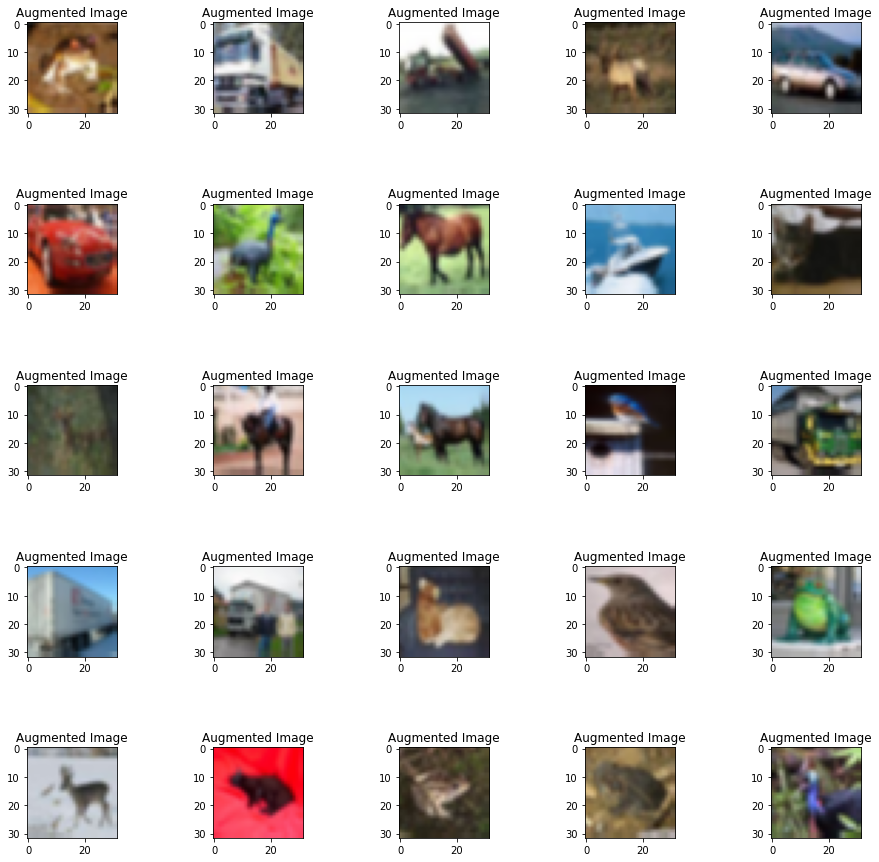

In [ ]:
def mean_filter2d(img):
  return tfa.image.mean_filter2d(img, filter_shape=2)

def data_generator(x_train,func):
  x_train=x_train.reshape(-1,32,32,3)
  train_dataset=tf.data.Dataset.from_tensor_slices(x_train)
  train_dataset=train_dataset.map(func)
  train_dataset=train_dataset.batch(512)
  return train_dataset

def show_img(train_dataset):
  plt.figure(figsize=(15,15))
  for i in range(25):
    for val in train_dataset.take(1):
      plt.subplot(5,5,i+1)
      plt.imshow(val[i])
      plt.title("Augmented Image")
      plt.subplots_adjust(wspace=1, hspace=1)
  plt.show()

train_dataset = data_generator(x_train, mean_filter2d)
show_img(train_dataset)

## Original Image

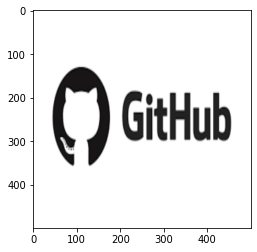

In [ ]:
def read_img(img_path):
  img_raw = tf.io.read_file(img_path)
  img = tf.io.decode_image(img_raw,channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = tf.image.resize(img, [500,500])
  return img

img_path = '/content/github.png'

img=read_img(img_path)
plt.imshow(img)


## Mean Filter2D

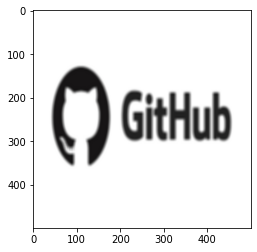

In [ ]:
img=read_img(img_path)

mean_filter = tfa.image.mean_filter2d(img, filter_shape=8)
plt.imshow(mean_filter)

## Randomh hsv in yiq

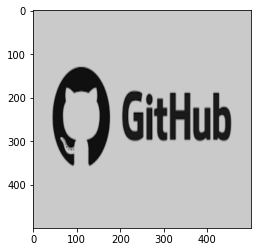

In [ ]:
img=read_img(img_path)

delta = 0.8
lower_saturation = 0.2
upper_saturation = 0.9
lower_value = 0.2
upper_value = 1.0
rand_hsvinyiq = tfa.image.random_hsv_in_yiq(img, delta, lower_saturation,
                                            upper_saturation, lower_value, upper_value)
plt.imshow(rand_hsvinyiq)


## Dense image warp

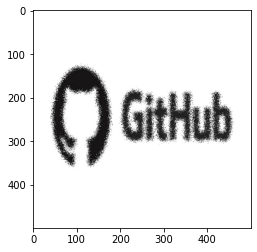

In [ ]:
img=read_img(img_path)

img = tf.image.convert_image_dtype(tf.expand_dims(img, 0), tf.dtypes.float32)
flow_shape = [1, img.shape[1], img.shape[2], 2]
init_flows = np.float32(np.random.normal(size=flow_shape) * 3.0)
dense_img_warp = tfa.image.dense_image_warp(img, init_flows)
dense_img_warp = tf.reshape(dense_img_warp, [500,500,3])
plt.imshow(dense_img_warp)

## Euclidean dist transform

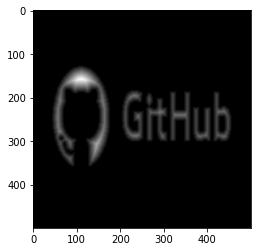

In [ ]:
img=read_img(img_path)
gray = 1.0 - tf.image.rgb_to_grayscale(img)

gray = tf.image.convert_image_dtype(gray,tf.uint8)
gray = tf.expand_dims(gray, 0)
eucid = tfa.image.euclidean_dist_transform(gray)
eucid = tf.reshape(eucid,[500,500])
plt.imshow(eucid, cmap='gray')

## Combining Multiple Augmentation

##### Adjust_brightness
##### Adjust_contrast
##### Adjust_hue
##### Random_crop
##### Flip_left_right
##### Flip_up_down

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


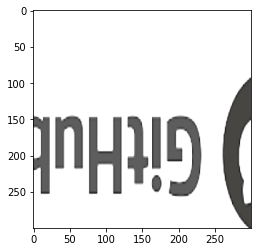

In [ ]:
def multiple_aug(img):
  img = tf.image.adjust_brightness(img, delta=1)
  img = tf.image.adjust_contrast(img,
                                 contrast_factor=2)
  img = tf.image.adjust_hue(img,
                            delta=0.2)
  img = tf.image.flip_left_right(img)
  img = tf.image.flip_up_down(img)
  img = tf.image.random_crop(img,
                             size=tf.constant([300,300,3]))
  return img

img_path = '/content/github.png'
img = read_img(img_path)
img = multiple_aug(img)
plt.imshow(img)
